In [138]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import scipy.io
import cartopy
import warnings
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.feature as cfeature
import numpy as np
from matplotlib.pyplot import figure
from matplotlib.offsetbox import AnchoredText
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
%matplotlib inline

In [93]:
# load in earthquake data from 1900-2010.
# Note there isn't significant seismogram data from these events, just a location, estimated moment magnitude, and time.
earthquakes=pd.read_csv('SHEEF2010_clustering_data.csv')
earthquakes.describe()

,MW,Long,Lat
count,41690.000000,41690.000000,41690.000000
mean,3.148738,-122.140018,55.656258
std,0.881266,24.963434,8.024276
min,1.800000,-160.000000,38.000000
25%,2.500000,-135.431500,49.461000
50%,2.900000,-130.201000,53.652000
75%,3.700000,-120.830000,60.260000
max,9.300000,-45.711000,84.110000


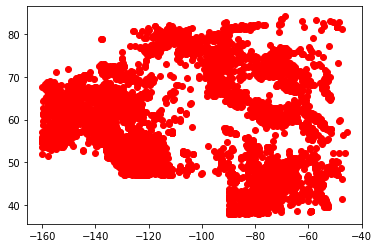

In [94]:
plt.scatter(earthquakes.Long,earthquakes.Lat,marker='o', color='red')

In [107]:
#find earthquakes in the desired latitude and longitude
df=df.loc[df.Long < -110, :]
df=df.loc[df.Long > -161, :]
df=df.loc[df.Lat > 40, :]
df=df.loc[df.Lat < 70, :]
df=df.loc[df.MW > 3.9, :]

#find only earthquakes above M3.9
# M3.9-4.9
df4=df.loc[df.MW >= 3.9, :]
df4=df.loc[df.MW < 4.9, :]

# M4.9-5.9
df5=df.loc[df.MW >= 4.9, :]
df5=df.loc[df.MW < 5.9, :]

# M5.9-6.9
df6=df.loc[df.MW >= 5.9, :]
df6=df.loc[df.MW < 6.9, :]

# M7+
df7=df.loc[df.MW > 7, :]

#show stats
df.describe()

,MW,Long,Lat
count,31.000000,31.000000,31.000000
mean,7.590323,-145.053839,58.232581
std,0.543663,9.602961,4.022293
min,7.100000,-159.433000,48.500000
25%,7.200000,-152.210000,56.260000
50%,7.400000,-147.180000,58.620000
75%,7.850000,-138.120000,60.272500
max,9.300000,-125.000000,65.915000


In [108]:
df4.describe()

,MW,Long,Lat
count,6767.000000,6767.000000,6767.000000
mean,4.300842,-144.234876,57.988816
std,0.241744,10.486229,5.164208
min,4.000000,-160.000000,47.000000
25%,4.100000,-152.581000,55.462500
50%,4.300000,-148.310000,59.030000
75%,4.500000,-133.370000,61.595500
max,4.800000,-111.300000,69.974000


In [109]:
df5.describe()

,MW,Long,Lat
count,8033.000000,8033.000000,8033.000000
mean,4.442213,-144.082723,57.834392
std,0.409766,10.526061,5.150534
min,4.000000,-160.000000,47.000000
25%,4.100000,-152.529000,55.100000
50%,4.300000,-148.000000,58.822000
75%,4.600000,-132.490000,61.430000
max,5.800000,-111.300000,69.974000


In [110]:
df6.describe()

,MW,Long,Lat
count,8316.000000,8316.000000,8316.000000
mean,4.503632,-144.089024,57.800863
std,0.521445,10.531810,5.138953
min,4.000000,-160.000000,47.000000
25%,4.100000,-152.540750,55.018500
50%,4.400000,-148.027500,58.770000
75%,4.700000,-132.397000,61.384000
max,6.800000,-111.300000,69.974000


In [111]:
df7.describe()

,MW,Long,Lat
count,31.000000,31.000000,31.000000
mean,7.590323,-145.053839,58.232581
std,0.543663,9.602961,4.022293
min,7.100000,-159.433000,48.500000
25%,7.200000,-152.210000,56.260000
50%,7.400000,-147.180000,58.620000
75%,7.850000,-138.120000,60.272500
max,9.300000,-125.000000,65.915000


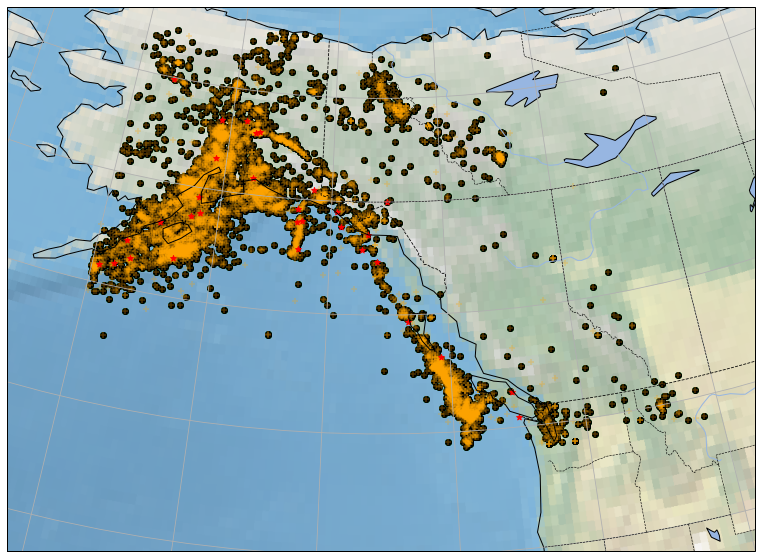

In [147]:
# plot a geographic image

# the study area
extent = [-161, -110, 40, 70]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

#figure size
plt.figure(figsize=(14, 10))
# the type of plot, features of plot
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
plt.scatter(df4.Long,df4.Lat, transform=ccrs.Geodetic(), marker='o', color='green')
plt.scatter(df4.Long,df4.Lat, transform=ccrs.Geodetic(), marker='o', color='black')
plt.scatter(df6.Long,df6.Lat, transform=ccrs.Geodetic(), marker='+', color='orange', alpha=0.3)
plt.scatter(df7.Long,df7.Lat, transform=ccrs.Geodetic(), marker='*', color='red')

ax.set_extent(extent)
ax.stock_img()
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(country_bodr, linestyle='--', linewidth=0.8, edgecolor="k", zorder=10)  #USA/Canada
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)
ax.gridlines()

**Don't need to standardize data because the means are close together and there is very low variance in the magnitude. If we decided to scale, could apply the below transform to the datasets.**

In [ ]:
# Normalize (Standard) and apply to the data
# scaler = StandardScaler()
# df=scaler.fit_transform(df)

**Elbow method to find number of clusters.**

C:\Users\avand\anaconda3\envs\Data_sci\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


Text(0.5, 0, 'Number of clusters')

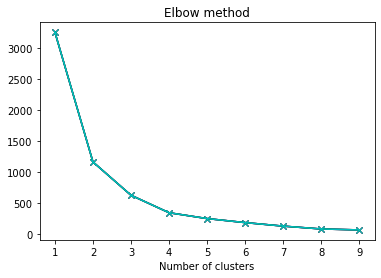

In [137]:
#Finding the optimal K using the elbow method
Sum_of_squared_distances4 = []
Sum_of_squared_distances5 = []
Sum_of_squared_distances6 = []
Sum_of_squared_distances7 = []

K = range(1,10)
for i in K:
    km = KMeans(n_clusters=i)
    km1 = km.fit(df4) 
    km2 = km.fit(df5)
    km3 = km.fit(df6) 
    km4 = km.fit(df7)
    Sum_of_squared_distances4.append(km1.inertia_)
    Sum_of_squared_distances5.append(km2.inertia_)
    Sum_of_squared_distances6.append(km3.inertia_)
    Sum_of_squared_distances7.append(km4.inertia_)
    
plt.plot(K, Sum_of_squared_distances4, 'rx-')
plt.plot(K, Sum_of_squared_distances5, 'bx-')
plt.plot(K, Sum_of_squared_distances6, 'gx-')
plt.plot(K, Sum_of_squared_distances7, 'cx-')
plt.title('Elbow method')
plt.xlabel('Number of clusters')

In [151]:
#cluster object
kmean=KMeans(n_clusters=3, random_state=10)

# gwet labels for 
labels4=kmean.fit_predict(df4)
df4['Cluster']=kmean.labels_
colors4 = cm.nipy_spectral(labels4.astype(float) / 3)

labels5=kmean.fit_predict(df5)
df5['Cluster']=kmean.labels_
colors5 = cm.nipy_spectral(labels5.astype(float) / 3)

labels6=kmean.fit_predict(df6)
df6['Cluster']=kmean.labels_
colors6 = cm.nipy_spectral(labels6.astype(float) / 3)

labels7=kmean.fit_predict(df7)
df7['Cluster']=kmean.labels_
colors7 = cm.nipy_spectral(labels7.astype(float) / 3)


C:\Users\avand\anaconda3\envs\Data_sci\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\avand\anaconda3\envs\Data_sci\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\avand\anaconda3\envs\Data_sci\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

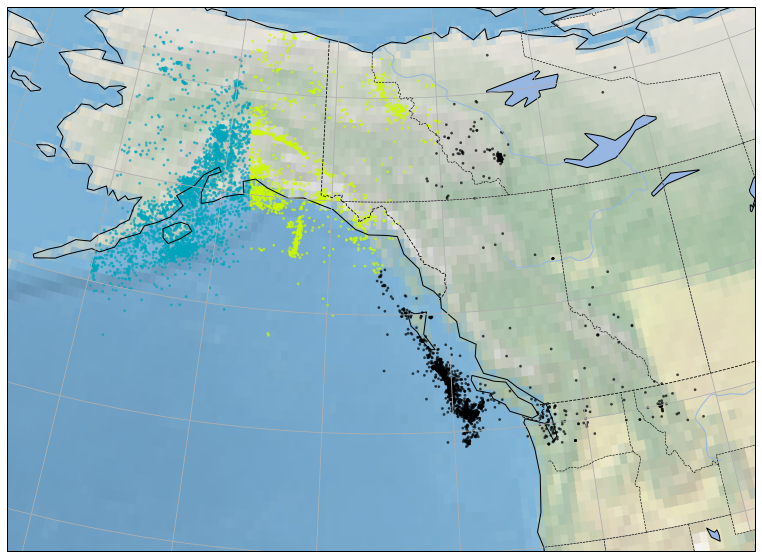

In [150]:
# plot a geographic image

# the study area
extent = [-161, -110, 40, 70]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

#figure size
plt.figure(figsize=(14, 10))
# the type of plot, features of plot
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
plt.scatter(df4.Long,df4.Lat, transform=ccrs.Geodetic(), marker='.', s=30, lw=0, alpha=0.7,
                c=colors4, edgecolor='k')

ax.set_extent(extent)
ax.stock_img()
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(country_bodr, linestyle='--', linewidth=0.8, edgecolor="k", zorder=10)  #USA/Canada
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)
ax.gridlines()

C:\Users\avand\anaconda3\envs\Data_sci\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


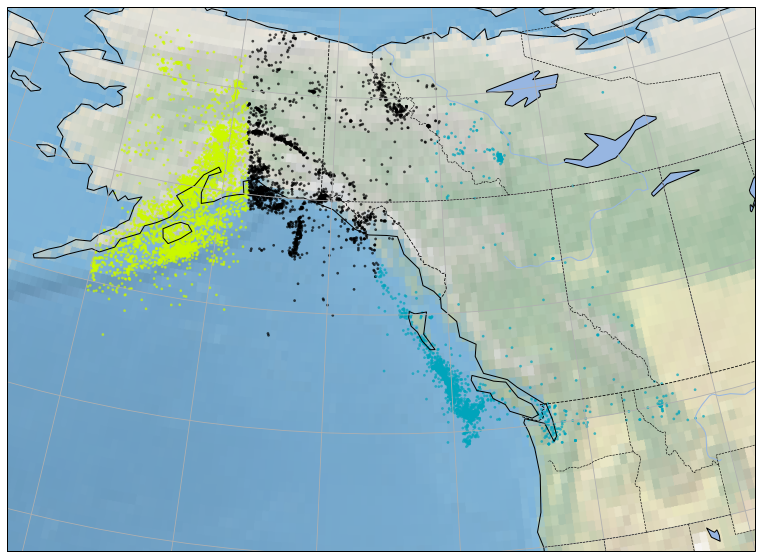

In [152]:
# plot a geographic image

# the study area
extent = [-161, -110, 40, 70]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

#figure size
plt.figure(figsize=(14, 10))
# the type of plot, features of plot
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
plt.scatter(df5.Long, df5.Lat, transform=ccrs.Geodetic(), marker='.', s=30, lw=0, alpha=0.7,
                c=colors5, edgecolor='k')

ax.set_extent(extent)
ax.stock_img()
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(country_bodr, linestyle='--', linewidth=0.8, edgecolor="k", zorder=10)  #USA/Canada
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)
ax.gridlines()

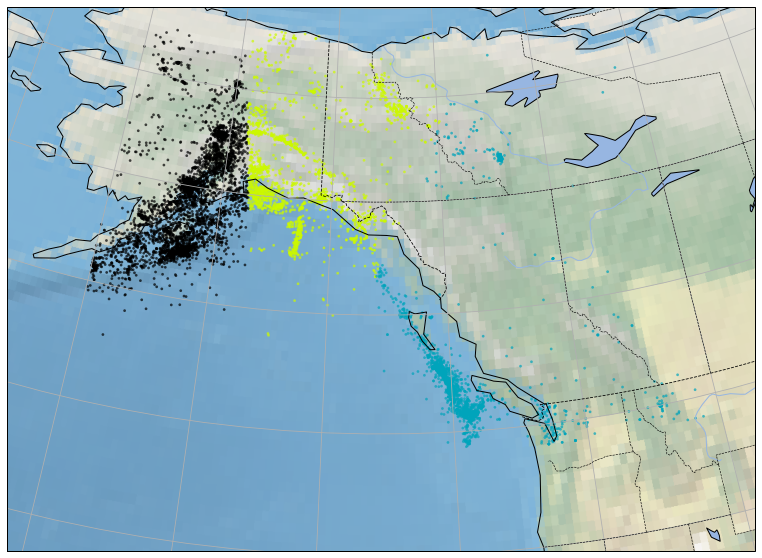

In [153]:
# plot a geographic image

# the study area
extent = [-161, -110, 40, 70]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

#figure size
plt.figure(figsize=(14, 10))
# the type of plot, features of plot
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
plt.scatter(df6.Long,df6.Lat, transform=ccrs.Geodetic(), marker='.', s=30, lw=0, alpha=0.7,
                c=colors6, edgecolor='k')

ax.set_extent(extent)
ax.stock_img()
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(country_bodr, linestyle='--', linewidth=0.8, edgecolor="k", zorder=10)  #USA/Canada
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)
ax.gridlines()

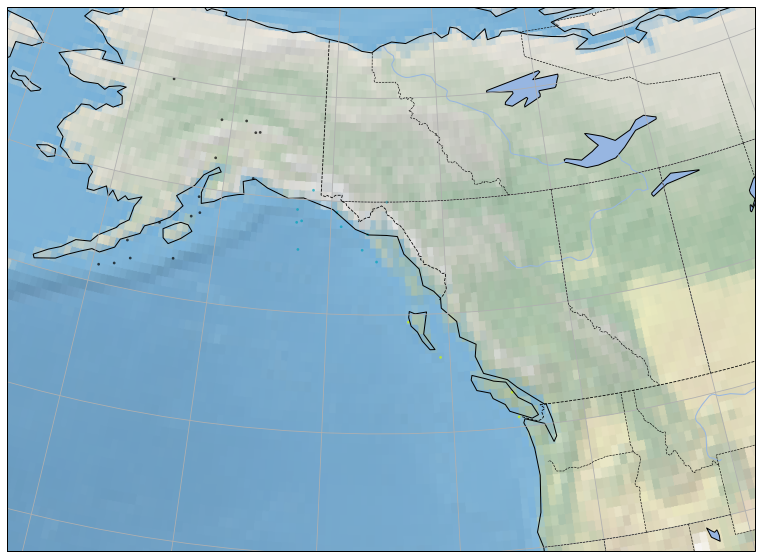

In [154]:
# plot a geographic image

# the study area
extent = [-161, -110, 40, 70]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

#figure size
plt.figure(figsize=(14, 10))
# the type of plot, features of plot
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
plt.scatter(df7.Long, df7.Lat, transform=ccrs.Geodetic(), marker='.', s=30, lw=0, alpha=0.7,
                c=colors7, edgecolor='k')

ax.set_extent(extent)
ax.stock_img()
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(country_bodr, linestyle='--', linewidth=0.8, edgecolor="k", zorder=10)  #USA/Canada
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)
ax.gridlines()

**The previous clusters show 2 groups:**
1) is a group mostly caused by subduction along the cascadia subduction zone, the juan de fuca plate subducting under the north american plate. 

2) The Pacific plate subducting under the north american plate along the south coast of alaska.

**Things to note:**

1) The earthquakes located underneath land masses are deep earthquakes, possibly in the wadati-benioff zone, or were triggered by a fault slipping, possibly because of another earthquake.

2) The earhquakes trace the active plate margins between the northamerican plate (crustal) and the pacific plate (oceanic)

3) The earthquakes located offshore Vancouver are especially hazardous due to the proximity of a large population center and the potential for large amplification due to the basin Vancouver sits on.

# Now lets try and determine clusters for the group of earthquakes offshore Vancouver

In [160]:
dfv=df.loc[df.Long < -120, :]
dfv=dfv.loc[dfv.Long > -140, :]
dfv=dfv.loc[dfv.Lat > 43, :]
dfv=dfv.loc[dfv.Lat < 59, :]
dfv=dfv.loc[dfv.MW > 4, :]

C:\Users\avand\anaconda3\envs\Data_sci\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


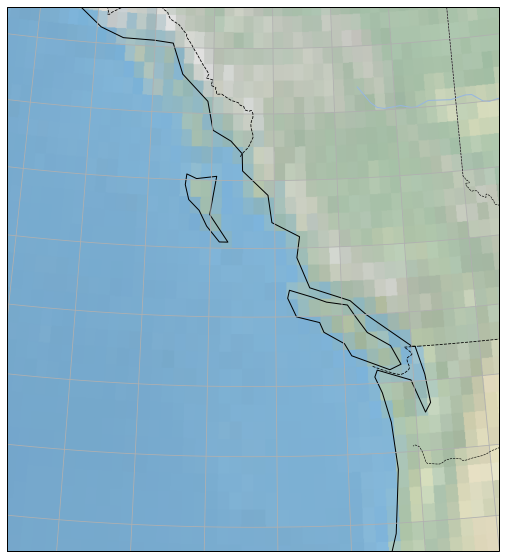

In [161]:
# plot a geographic image

# the study area
extent = [-140, -120, 43, 59]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

#figure size
plt.figure(figsize=(14, 10))
# the type of plot, features of plot
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
# plt.scatter(df7.Long, df7.Lat, transform=ccrs.Geodetic(), marker='.', s=30, lw=0, alpha=0.7,
#                 c=colors7, edgecolor='k')

ax.set_extent(extent)
ax.stock_img()
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(country_bodr, linestyle='--', linewidth=0.8, edgecolor="k", zorder=10)  #USA/Canada
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)
ax.gridlines()

C:\Users\avand\anaconda3\envs\Data_sci\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  f"KMeans is known to have a memory leak on Windows "


Text(0.5, 0, 'Number of clusters')

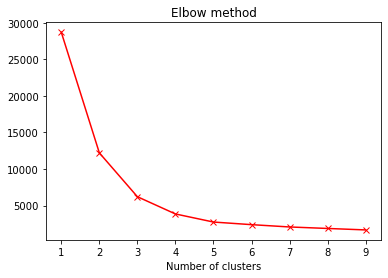

In [162]:
#Finding the optimal K using the elbow method
Sum_of_squared_distancesv = []

K = range(1,10)
for i in K:
    km = KMeans(n_clusters=i)
    kmv = km.fit(dfv) 
    Sum_of_squared_distancesv.append(kmv.inertia_)
    
plt.plot(K, Sum_of_squared_distancesv, 'rx-')
plt.title('Elbow method')
plt.xlabel('Number of clusters')

In [171]:
kmeans=KMeans(n_clusters=3, random_state=10)
labelsv=kmeans.fit_predict(dfv)
dfv['Clusters']=kmeans.labels_
colorsv = cm.nipy_spectral(labelsv.astype(float) / 3)

C:\Users\avand\anaconda3\envs\Data_sci\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


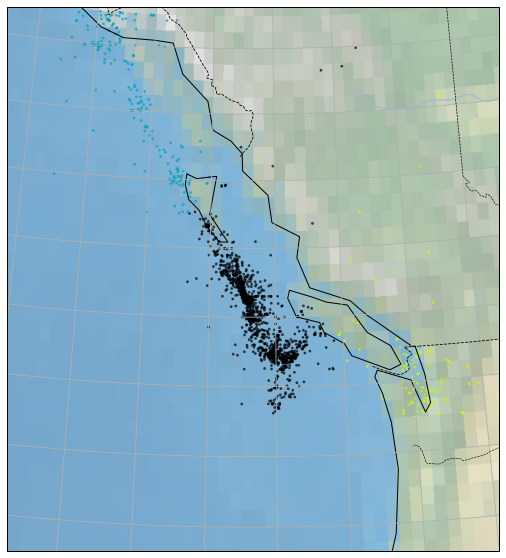

In [172]:
# plot a geographic image

# the study area
extent = [-140, -120, 43, 59]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

#figure size
plt.figure(figsize=(14, 10))
# the type of plot, features of plot
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
plt.scatter(dfv.Long, dfv.Lat, transform=ccrs.Geodetic(), marker='.', s=30, lw=0, alpha=0.7,
                c=colorsv, edgecolor='k')

ax.set_extent(extent)
ax.stock_img()
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(country_bodr, linestyle='--', linewidth=0.8, edgecolor="k", zorder=10)  #USA/Canada
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)
ax.gridlines()